<a href="https://colab.research.google.com/github/AlirezaSM/template-matching/blob/main/attention_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [74]:
template = cv2.imread('/content/drive/MyDrive/Dataset/Dataset/Sample0108_Template.png', cv2.IMREAD_ANYCOLOR)[...,::-1]
image = cv2.imread('/content/drive/MyDrive/Dataset/Dataset/Sample0108_Image.png')[...,::-1]

file = open('/content/drive/MyDrive/Dataset/Dataset/Sample0108_Box.txt', 'r')
gt = file.readline().strip().split(',')
gt = [int(i) for i in gt]

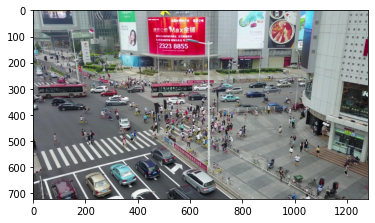

In [75]:
plt.imshow(image)

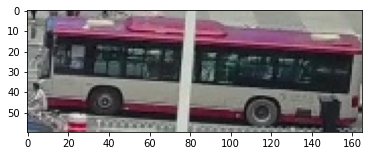

In [76]:
plt.imshow(template)

In [77]:
candidate_size = (template.shape[0] // 2, template.shape[1] // 2)
stride_size = (template.shape[0] // 4, template.shape[1] // 4)
print(template.shape, candidate_size, stride_size)

(60, 165, 3) (30, 82) (15, 41)


In [78]:
m = np.array([int(np.mean(template[...,0])), int(np.mean(template[...,1])), int(np.mean(template[...,2]))])
start_point = [0, 0]
min_value = 0
min_index = [0, 0]
for i in range(3):
    start_point[0] = i * stride_size[0]
    for j in range(3):
        start_point[1] = j * stride_size[1]
        candid = template.copy()
        candid[start_point[0]: start_point[0] + candidate_size[0], start_point[1]: start_point[1] + candidate_size[1]] = m
        i_product = sum(candid.reshape(-1)* template.reshape(-1))
        if i == 0 and j == 0:
            min_value = i_product
            
        if i_product < min_value:
            min_value = i_product
            min_index = [i, j]
        
        # plt.figure()
        # plt.imshow(candid)


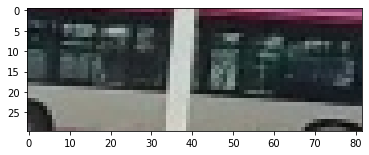

In [85]:
#finding key part
start_point[0] = min_index[0] * stride_size[0]
start_point[1] = min_index[1] * stride_size[1]

candid = template.copy()
candid=candid[start_point[0]: start_point[0] + candidate_size[0], start_point[1]: start_point[1] + candidate_size[1]]
plt.figure()
plt.imshow(candid)


In [59]:
print(sum(candid.reshape(-1)* template.reshape(-1)))

3402251
